In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [121]:
from sklearn.linear_model import LinearRegression # Import Linear Regression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.metrics import classification_report, confusion_matrix
import pydotplus
from mpl_toolkits import mplot3d
from sklearn import metrics

# Data Sample

In [6]:
df = pd.read_csv('C:/Users/anhqu/Downloads/szeged-weather/weatherHistory.csv')

In [7]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Columns

In [11]:
for i in range(1, len(df.columns)):
    print(df.columns[i], type(df.iloc[0,i]))

Column names: 
Summary <class 'str'>
Precip Type <class 'str'>
Temperature (C) <class 'numpy.float64'>
Apparent Temperature (C) <class 'numpy.float64'>
Humidity <class 'numpy.float64'>
Wind Speed (km/h) <class 'numpy.float64'>
Wind Bearing (degrees) <class 'numpy.float64'>
Visibility (km) <class 'numpy.float64'>
Loud Cover <class 'numpy.float64'>
Pressure (millibars) <class 'numpy.float64'>
Daily Summary <class 'str'>


# Select Independent and Dependent Variables

### Independent

In [157]:
X_org = df.iloc[:, 3].values

# If select 1 variable, then the dimension needs to be reshaped in order to run the model
if X_org.ndim == 1:
    X = np.array(X_org).reshape(-1, 1) 
else:
    pass

### Variables

In [141]:
y = df.iloc[:, 5].values

# Regression

### Partitition Training Dataset

In [142]:
test_size_input = 0.5

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_input, random_state=0)

### Run Regression Model

In [144]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
y_pred = regressor.predict(X_test)

# Interpret Results

In [146]:
print('Intercept: ')
print(regressor.intercept_)
print('Coefficient: ')
print(regressor.coef_)

Intercept: 
0.8896516495200448
Coefficient: 
[-0.01296211]


### Sample Predicted vs Actual

In [147]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head()

,Actual,Predicted
0,0.93,0.702709
1,0.72,0.732090
2,0.61,0.579065
3,0.87,0.695220
4,0.77,0.723737


# Plot

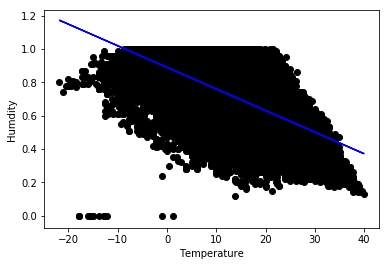

In [166]:
if X_org.ndim ==1: 
    # Plot outputs
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, y_pred, color='blue')
    plt.xlabel('Temperature')
    plt.ylabel('Humdity')
    plt.show()
if X_org.ndim ==2: 
    # Plot outputs
    ax = plt.axes(projection='3d')
    ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c=y_test);
else:
    pass

# Evaluate Model: actual vs predicted

In [159]:
abs_err = metrics.mean_absolute_error(y_test, y_pred)
sq_err = metrics.mean_squared_error(y_test, y_pred)
rms = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', abs_err)
print('Mean Squared Error:', sq_err)
print('Root Mean Squared Error:', rms)

Mean Absolute Error: 0.12196175266971507
Mean Squared Error: 0.022953751283586846
Root Mean Squared Error: 0.15150495465029137


In [160]:
df['Humidity'].describe()

count    96453.000000
mean         0.734899
std          0.195473
min          0.000000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64

In [161]:
if rms / df['Humidity'].mean() < .1:
    print('Root Mean Squared Error is less than 10% of the Mean Value of the Actual Target Variable. OK')
else: 
    print('Root Mean Squared Error is more than 10% of the Mean Value of the Actual Target Variable. Mehh')

Root Mean Squared Error is more than 10% of the Mean Value of the Actual Target Variable. Mehh


# Best Fitted Curve

In [162]:
from scipy.optimize import curve_fit